In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the training data
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
# Load the training data
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [4]:
train_data.shape

(1258, 6)

In [5]:
test_data.shape

(20, 6)

In [6]:
data = pd.concat((train_data['Open'],test_data['Open']),axis=0)

In [7]:
# scaling

In [8]:
prices = np.array(data.values)

In [9]:
prices = prices.reshape(-1,1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
price_scaled = scaler.fit_transform(prices)

In [12]:
# Split the data into training and testing sets
train_size = int(len(price_scaled) * 0.8)
train_data = price_scaled[:train_size]
test_data = price_scaled[train_size:]

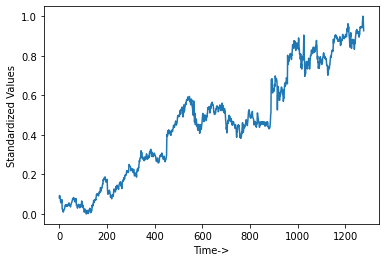

In [13]:
plt.plot(price_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

In [14]:
# create the sequence data

In [15]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [16]:
seq_len = 20
x_train, y_train = create_sequences(train_data,seq_len)
x_test, y_test = create_sequences(test_data,seq_len)

In [17]:
# create model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, Dropout

In [19]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(seq_len, 1)))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
# model.add(Dropout(0.2))

# model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
# model.add(Dropout(0.2))

# model.add(SimpleRNN(units=50))
# model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Metal device set to: Apple M1


2023-05-24 10:57:47.947688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-24 10:57:47.952495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=50,validation_split=0.2)

Epoch 1/5
17/17 [==============================] - 4s 222ms/step - loss: 0.0028 - val_loss: 0.0198
Epoch 2/5
17/17 [==============================] - 4s 212ms/step - loss: 0.0023 - val_loss: 0.0168
Epoch 3/5
17/17 [==============================] - 4s 212ms/step - loss: 0.0020 - val_loss: 0.0141
Epoch 4/5
17/17 [==============================] - 4s 213ms/step - loss: 0.0019 - val_loss: 0.0165
Epoch 5/5
17/17 [==============================] - 4s 216ms/step - loss: 0.0020 - val_loss: 0.0167


In [30]:
# Evaluate the model
loss = model.evaluate(x_test, y_test)
print('Test Loss:', loss)

8/8 [==============================] - 0s 36ms/step - loss: 0.0429
Test Loss: 0.042888861149549484


In [31]:
# Make predictions
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 33ms/step


In [32]:
y_pred = scaler.inverse_transform(y_pred)

In [33]:
y_pred.shape

(236, 1)

In [34]:
prices[(y_pred.shape[0]*-1):].shape

(236, 1)

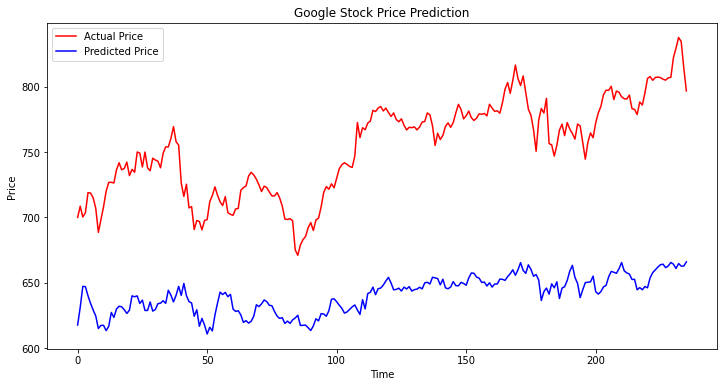

In [39]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices[(y_pred.shape[0]*-1):], color='red', label='Actual Price')
plt.plot(y_pred, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [27]:
# SimpleRNN Layer:
# The SimpleRNN (Simple Recurrent Neural Network) layer is a type of recurrent layer in neural networks that is designed to process sequential data, such as time series or text data. It is based on the concept of recurrent neural networks (RNNs) and is particularly suitable for modeling dependencies and patterns over time.
# The SimpleRNN layer processes input sequences by maintaining an internal state or memory that gets updated at each time step. It takes the input at the current time step along with the previous state and computes an output and an updated state. This allows the network to capture temporal dependencies and learn representations that consider the order and context of the input sequence.

# However, SimpleRNN layers can suffer from vanishing gradient problems when dealing with long sequences, which can limit their ability to capture long-term dependencies. Therefore, more advanced recurrent layers like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are often preferred in practice. These layers address the vanishing gradient problem and have additional mechanisms to handle longer sequences more effectively.

# Dropout Regularization:
# Dropout is a regularization technique commonly used in neural networks, including recurrent neural networks (RNNs), to prevent overfitting. It helps to improve the generalization capability of the model and reduce the likelihood of the network relying too heavily on specific activations or features during training.
# During training, the Dropout technique randomly sets a fraction of the input units or activations to zero at each update. This means that during each training iteration, a different random subset of units is "dropped out" or deactivated. This forces the network to learn more robust representations that are not overly dependent on specific neurons.

# By randomly dropping out units, Dropout reduces the complex co-adaptations between neurons, making the network more resilient and less prone to overfitting. It can also be seen as an ensemble learning technique, where multiple subnetworks with shared weights are trained simultaneously.

# In summary, the SimpleRNN layer is a recurrent layer that captures sequential dependencies in data, while Dropout is a regularization technique that helps prevent overfitting by randomly deactivating units or activations during training. Both techniques are valuable components in building neural network models for various tasks.